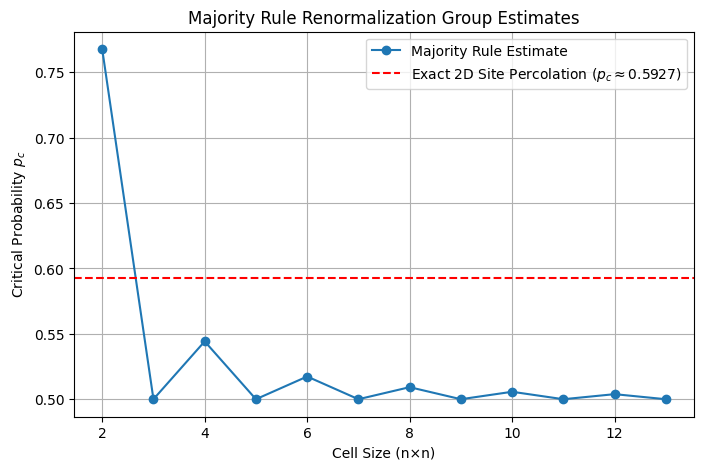

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.optimize import root_scalar

def majority_rule_p_prime(p, cell_size):
    """Compute renormalized probability p' using majority rule."""
    n = cell_size
    total_sites = n * n
    majority_threshold = total_sites // 2 + 1
    p_prime = 0.0
    for k in range(majority_threshold, total_sites + 1):
        p_prime += comb(total_sites, k) * (p ** k) * ((1 - p) ** (total_sites - k))
    return p_prime

def find_p_c(cell_size, bracket=None):
    """Find p_c by dynamically adjusting the bracket."""
    if bracket is None:
        # Default brackets based on cell size
        if cell_size == 2:
            bracket = (0.7, 0.8)  # Fixed point ~0.767
        else:
            bracket = (0.5, 0.7)  # Works for larger cells
    def func(p):
        return majority_rule_p_prime(p, cell_size) - p
    result = root_scalar(func, bracket=bracket, method='brentq')
    return result.root

# Compute p_c for cell sizes 2x2 to 10x10
cell_sizes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
p_c_values = [find_p_c(size) for size in cell_sizes]

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(cell_sizes, p_c_values, 'o-', label='Majority Rule Estimate')
plt.axhline(0.5927, color='red', linestyle='--', label='Exact 2D Site Percolation ($p_c \\approx 0.5927$)')
plt.xlabel('Cell Size (n×n)')
plt.ylabel('Critical Probability $p_c$')
plt.title('Majority Rule Renormalization Group Estimates')
plt.legend()
plt.grid(True)
plt.show()